In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics

from node2vec import Node2Vec

sns.set_style('whitegrid')

In [2]:
edges_emails = pd.read_csv('../data/emails/edges.txt', sep=' ', header=None, names=['from','to'])
labels_emails = pd.read_csv('../data/emails/node-label.txt', sep=' ', header=None, names=['node', 'label'])

n_clusters = len(labels_emails['label'].unique())

freq = labels_emails['label'].value_counts()
freq = freq[:10]
freq_labels = freq.index.tolist()
freq_labels

[4, 14, 1, 21, 15, 7, 0, 10, 17, 9]

In [3]:
freq_labels_emails = pd.DataFrame(columns=['node','label'])

for i, row in labels_emails.iterrows():
    if row['label'] in freq_labels:
        _new_row = {'node':row['node'],'label':row['label']}
        freq_labels_emails = freq_labels_emails.append(_new_row,ignore_index=True)      

In [4]:
print(len(freq_labels_emails), len(labels_emails))

588 1005


In [5]:
# drop edges with non frequent nodes
freq_nodes = []
freq_nodes = freq_labels_emails['node'].to_list()

freq_edges_emails = edges_emails

count = 0
for i, row in edges_emails.iterrows():
    if row['from'] not in freq_nodes:
        freq_edges_emails = freq_edges_emails.drop(int(i))
        continue
    if row['to'] not in freq_nodes:
        freq_edges_emails = freq_edges_emails.drop(int(i))

In [6]:
print(len(freq_edges_emails), len(edges_emails))

8904 25571


In [7]:
freq_labels.sort()
freq_labels

[0, 1, 4, 7, 9, 10, 14, 15, 17, 21]

In [8]:
# rename frequent labels
rename_lab_dic = {} # old label -> new label
new_name = 0 
for i in freq_labels:
    rename_lab_dic[i] = new_name
    new_name+=1
rename_lab_dic   

{0: 0, 1: 1, 4: 2, 7: 3, 9: 4, 10: 5, 14: 6, 15: 7, 17: 8, 21: 9}

In [9]:
# old labels
freq_labels_emails

node label
0       0     1
1       1     1
2       2    21
3       3    21
4       4    21
..    ...   ...
583   998    14
584   999    15
585  1000     4
586  1001    21
587  1002     1

[588 rows x 2 columns]

In [10]:
# labels renaming in the df
freq_labels_emails.label = freq_labels_emails.label.map(rename_lab_dic)

In [11]:
# new labels
freq_labels_emails

node  label
0       0      1
1       1      1
2       2      9
3       3      9
4       4      9
..    ...    ...
583   998      6
584   999      7
585  1000      2
586  1001      9
587  1002      1

[588 rows x 2 columns]

In [12]:
G_emails = nx.Graph()
G_emails.add_nodes_from(freq_edges_emails['from'])
G_emails.add_nodes_from(freq_edges_emails['to'])

In [13]:
for i, row in freq_edges_emails.iterrows():
    G_emails.add_edge(row['from'], row['to'], weight=1)

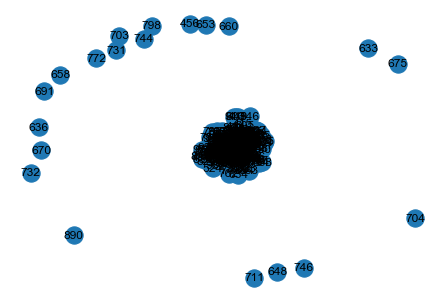

In [14]:
pos = nx.spring_layout(G_emails)
nx.draw(G_emails, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

In [15]:
node2vec = Node2Vec(G_emails, dimensions=128, walk_length=80, num_walks=10, workers=4)

Computing transition probabilities: 100%|██████████| 568/568 [00:03<00:00, 178.77it/s]


In [16]:
node2vec.walks[:10]

[['666',
  '441',
  '608',
  '332',
  '141',
  '951',
  '666',
  '324',
  '555',
  '754',
  '19',
  '11',
  '406',
  '501',
  '500',
  '501',
  '44',
  '367',
  '183',
  '93',
  '114',
  '261',
  '261',
  '171',
  '976',
  '527',
  '976',
  '47',
  '547',
  '114',
  '46',
  '447',
  '46',
  '45',
  '447',
  '15',
  '269',
  '592',
  '322',
  '140',
  '139',
  '216',
  '592',
  '429',
  '45',
  '216',
  '446',
  '139',
  '76',
  '263',
  '114',
  '464',
  '563',
  '563',
  '93',
  '450',
  '542',
  '172',
  '197',
  '172',
  '249',
  '12',
  '11',
  '621',
  '231',
  '249',
  '459',
  '467',
  '21',
  '346',
  '351',
  '191',
  '511',
  '7',
  '451',
  '161',
  '661',
  '570',
  '360',
  '498'],
 ['556',
  '14',
  '289',
  '14',
  '203',
  '201',
  '200',
  '167',
  '572',
  '515',
  '572',
  '377',
  '851',
  '681',
  '681',
  '191',
  '262',
  '349',
  '122',
  '347',
  '181',
  '628',
  '320',
  '393',
  '397',
  '377',
  '378',
  '377',
  '381',
  '397',
  '60',
  '380',
  '157',
  

In [17]:
model = node2vec.fit(window=10, min_count=1)

In [18]:
model.wv.vocab

{'666': <gensim.models.keyedvectors.Vocab at 0x16e0f7ae348>,
 '441': <gensim.models.keyedvectors.Vocab at 0x16e1123cbc8>,
 '608': <gensim.models.keyedvectors.Vocab at 0x16e1123cb08>,
 '332': <gensim.models.keyedvectors.Vocab at 0x16e1123cb88>,
 '141': <gensim.models.keyedvectors.Vocab at 0x16e1123ccc8>,
 '951': <gensim.models.keyedvectors.Vocab at 0x16e1123cd48>,
 '324': <gensim.models.keyedvectors.Vocab at 0x16e1123cc88>,
 '555': <gensim.models.keyedvectors.Vocab at 0x16e1123cdc8>,
 '754': <gensim.models.keyedvectors.Vocab at 0x16e1123c1c8>,
 '19': <gensim.models.keyedvectors.Vocab at 0x16e1123cc08>,
 '11': <gensim.models.keyedvectors.Vocab at 0x16e1123cd08>,
 '406': <gensim.models.keyedvectors.Vocab at 0x16e1123ce48>,
 '501': <gensim.models.keyedvectors.Vocab at 0x16e1123cd88>,
 '500': <gensim.models.keyedvectors.Vocab at 0x16e1123cec8>,
 '44': <gensim.models.keyedvectors.Vocab at 0x16e1123ce08>,
 '367': <gensim.models.keyedvectors.Vocab at 0x16e1123cf48>,
 '183': <gensim.models.keye

In [19]:
model_nodes = []
model_nodes = list(model.wv.vocab.keys())

In [20]:
(model_nodes)

['666',
 '441',
 '608',
 '332',
 '141',
 '951',
 '324',
 '555',
 '754',
 '19',
 '11',
 '406',
 '501',
 '500',
 '44',
 '367',
 '183',
 '93',
 '114',
 '261',
 '171',
 '976',
 '527',
 '47',
 '547',
 '46',
 '447',
 '45',
 '15',
 '269',
 '592',
 '322',
 '140',
 '139',
 '216',
 '429',
 '446',
 '76',
 '263',
 '464',
 '563',
 '450',
 '542',
 '172',
 '197',
 '249',
 '12',
 '621',
 '231',
 '459',
 '467',
 '21',
 '346',
 '351',
 '191',
 '511',
 '7',
 '451',
 '161',
 '661',
 '570',
 '360',
 '498',
 '556',
 '14',
 '289',
 '203',
 '201',
 '200',
 '167',
 '572',
 '515',
 '377',
 '851',
 '681',
 '262',
 '349',
 '122',
 '347',
 '181',
 '628',
 '320',
 '393',
 '397',
 '378',
 '381',
 '60',
 '380',
 '157',
 '493',
 '180',
 '419',
 '655',
 '280',
 '296',
 '342',
 '797',
 '448',
 '933',
 '847',
 '129',
 '213',
 '264',
 '707',
 '957',
 '265',
 '8',
 '569',
 '247',
 '506',
 '856',
 '720',
 '466',
 '873',
 '425',
 '4',
 '305',
 '880',
 '56',
 '485',
 '333',
 '423',
 '48',
 '245',
 '63',
 '256',
 '635',
 '520'

In [21]:
freq_labels_emails

node  label
0       0      1
1       1      1
2       2      9
3       3      9
4       4      9
..    ...    ...
583   998      6
584   999      7
585  1000      2
586  1001      9
587  1002      1

[588 rows x 2 columns]

In [22]:
freq_labels_emails = freq_labels_emails.set_index('node')
freq_labels_dic = freq_labels_emails.to_dict()
freq_labels_dic

{'label': {0: 1,
  1: 1,
  2: 9,
  3: 9,
  4: 9,
  7: 6,
  8: 6,
  9: 6,
  10: 4,
  11: 6,
  12: 6,
  14: 2,
  15: 8,
  17: 1,
  18: 1,
  19: 6,
  20: 4,
  21: 4,
  22: 4,
  43: 6,
  44: 6,
  45: 8,
  46: 8,
  47: 5,
  48: 5,
  52: 3,
  53: 2,
  56: 9,
  57: 9,
  58: 9,
  59: 9,
  60: 3,
  61: 3,
  63: 9,
  65: 2,
  67: 7,
  68: 7,
  69: 7,
  72: 4,
  73: 1,
  74: 1,
  75: 5,
  76: 5,
  81: 7,
  85: 1,
  91: 7,
  92: 4,
  93: 2,
  95: 2,
  103: 3,
  104: 3,
  113: 5,
  114: 5,
  119: 5,
  120: 1,
  122: 0,
  129: 2,
  130: 0,
  133: 2,
  137: 9,
  138: 9,
  139: 8,
  140: 8,
  141: 6,
  146: 7,
  148: 0,
  149: 0,
  150: 3,
  151: 5,
  156: 0,
  157: 0,
  161: 6,
  164: 8,
  167: 2,
  168: 2,
  171: 5,
  172: 2,
  176: 2,
  177: 1,
  178: 0,
  179: 0,
  180: 0,
  181: 3,
  182: 3,
  183: 2,
  184: 7,
  187: 7,
  188: 7,
  189: 7,
  190: 7,
  191: 0,
  192: 9,
  193: 9,
  194: 9,
  195: 9,
  197: 2,
  198: 2,
  199: 2,
  200: 2,
  201: 2,
  202: 2,
  203: 2,
  206: 2,
  207: 2,
  213: 6

In [23]:
freq_labels_dic['label'][664]

2

In [24]:
sorted_labels = []

for i in model_nodes:
    sorted_labels.append(freq_labels_dic['label'][int(i)])

In [25]:
print(sorted_labels)

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 2, 2, 5, 5, 5, 5, 5, 5, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 2, 2, 2, 2, 2, 2, 6, 6, 0, 0, 1, 7, 4, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 2, 2, 2, 3, 0, 1, 8, 8, 5, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 2, 9, 9, 9, 9, 5, 5, 5, 5, 5, 9, 2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 2, 2, 2, 2, 0, 0, 3, 3, 2, 4, 4, 2, 6, 6, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 2, 7, 8, 8, 8, 8, 8, 5, 5, 2, 2, 6, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2, 6, 2, 9, 9, 9, 3, 7, 1, 1, 3, 3, 3, 3, 3, 1, 9, 1, 9, 9, 9, 7, 7, 8, 8, 6, 6, 6, 6, 6, 6, 6, 2, 9, 4, 7, 7, 7, 2, 2, 2, 2, 2, 3, 3, 3, 0, 0, 3, 8, 8, 8, 9, 9, 9, 9, 8, 1, 3, 3, 2, 0, 0, 0, 1, 2, 6, 9, 2, 2, 2, 0, 0, 0, 4, 7, 4, 4, 7, 7, 7, 4, 7, 7, 4, 4, 4, 7, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 3, 3, 3, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 7, 1, 1, 1, 1, 1, 0, 6, 6, 6, 6, 6, 6, 1, 0, 2, 2, 2, 2, 1, 1, 8, 1, 1, 3, 2, 2, 1, 2, 2, 2, 2, 

In [26]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

array([1, 1, 1, 0, 0, 0])

In [27]:
kmeans.predict([[0, 0], [12, 3],[9,1],[1,1]])

array([1, 0, 0, 1])

In [28]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [29]:
model_X = model.wv.vectors

In [30]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(model_X)
clusters = kmeans.labels_
clusters

array([9, 4, 4, 4, 4, 8, 2, 2, 9, 4, 6, 2, 5, 4, 5, 2, 4, 6, 9, 2, 4, 0,
       0, 5, 9, 5, 4, 1, 4, 1, 1, 4, 3, 9, 4, 2, 2, 4, 4, 4, 9, 4, 0, 2,
       9, 0, 6, 6, 9, 2, 9, 9, 2, 2, 3, 0, 1, 9, 9, 5, 9, 2, 5, 9, 5, 1,
       3, 9, 1, 0, 3, 1, 2, 4, 0, 4, 2, 3, 2, 1, 1, 2, 4, 2, 9, 0, 2, 5,
       1, 6, 2, 2, 3, 2, 9, 2, 9, 2, 0, 9, 9, 3, 5, 2, 9, 6, 3, 2, 7, 6,
       2, 9, 0, 2, 4, 7, 7, 6, 4, 2, 1, 1, 9, 2, 0, 6, 4, 7, 1, 6, 9, 0,
       2, 6, 3, 2, 9, 4, 1, 5, 7, 3, 4, 9, 4, 7, 1, 6, 2, 0, 2, 6, 7, 3,
       4, 9, 2, 9, 7, 4, 2, 2, 7, 7, 5, 0, 5, 1, 3, 2, 3, 3, 3, 9, 6, 6,
       3, 3, 0, 5, 6, 0, 0, 4, 1, 4, 7, 0, 6, 1, 9, 5, 6, 2, 4, 9, 5, 5,
       0, 4, 4, 5, 6, 0, 7, 7, 7, 7, 6, 9, 1, 2, 6, 3, 2, 2, 2, 4, 7, 7,
       2, 3, 7, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 2, 4, 0, 4, 9, 1, 2, 0, 7, 1, 0, 6, 6, 3, 0, 5, 0, 1, 0, 2,
       3, 9, 0, 1, 0, 4, 4, 2, 3, 1, 3, 5, 5, 2, 7, 6, 5, 5, 7, 5, 2, 2,
       0, 0, 0, 2, 2, 5, 2, 2, 0, 4, 2, 2, 4, 1, 1,

In [31]:
score = metrics.f1_score(sorted_labels, clusters, average='micro')
score

0.0880281690140845

In [32]:
metrics.f1_score([2,2,1,1],[1,1,2,2],average='micro')

0.0

In [33]:
metrics.adjusted_rand_score(sorted_labels, clusters)

0.0009550726142076748

In [34]:
metrics.adjusted_mutual_info_score(sorted_labels, clusters)

0.006510319088631654

In [35]:
tsne = TSNE(n_components=2, random_state=7, perplexity=15)
model_X_2d = tsne.fit_transform(model_X)

In [36]:
model_X_2d

array([[-39.612526 ,   2.178794 ],
       [  3.807609 ,  15.945046 ],
       [  3.3470209,   6.1355968],
       ...,
       [  0.3260743,   0.836056 ],
       [  0.5014679,   0.8080079],
       [  0.7423597,  -4.421366 ]], dtype=float32)

In [37]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(model_X_2d)
clusters_2d = kmeans.labels_
clusters_2d

array([4, 1, 1, 1, 1, 2, 2, 2, 4, 1, 5, 2, 0, 1, 0, 2, 1, 5, 4, 2, 1, 9,
       9, 0, 4, 0, 1, 8, 1, 8, 8, 1, 6, 4, 1, 2, 2, 1, 1, 1, 4, 1, 9, 2,
       4, 9, 5, 5, 4, 2, 4, 4, 2, 2, 6, 9, 8, 4, 4, 0, 4, 2, 0, 9, 0, 8,
       6, 4, 8, 9, 6, 8, 2, 1, 9, 1, 2, 6, 2, 8, 8, 2, 1, 2, 4, 9, 2, 0,
       8, 5, 2, 2, 6, 2, 4, 2, 4, 2, 9, 4, 4, 6, 0, 2, 4, 5, 6, 2, 3, 5,
       2, 4, 9, 2, 1, 3, 3, 5, 1, 2, 8, 8, 9, 2, 9, 5, 1, 3, 8, 5, 4, 9,
       2, 5, 6, 2, 4, 1, 8, 0, 3, 6, 1, 4, 1, 3, 8, 5, 2, 9, 2, 5, 3, 6,
       1, 4, 2, 4, 3, 1, 2, 2, 3, 3, 0, 9, 0, 8, 6, 2, 6, 6, 6, 4, 5, 5,
       6, 6, 9, 0, 5, 9, 9, 1, 8, 1, 3, 9, 5, 8, 6, 0, 5, 2, 1, 4, 0, 0,
       9, 1, 1, 0, 5, 9, 3, 3, 3, 3, 5, 4, 8, 2, 5, 6, 2, 2, 2, 1, 3, 3,
       2, 6, 3, 2, 1, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 2, 9, 9, 1, 4, 8, 2, 9, 3, 8, 9, 5, 5, 6, 9, 0, 9, 8, 9, 2,
       6, 4, 1, 8, 9, 1, 9, 2, 6, 8, 6, 0, 0, 2, 3, 5, 0, 0, 3, 0, 2, 2,
       9, 9, 9, 2, 2, 0, 2, 2, 9, 1, 2, 2, 1, 8, 8,

In [38]:
metrics.f1_score(sorted_labels, clusters_2d,average='micro')

0.12147887323943662

In [39]:
metrics.adjusted_rand_score(sorted_labels, clusters_2d)

0.004018941084430142

In [40]:
metrics.adjusted_mutual_info_score(sorted_labels, clusters_2d)

0.014626290318489466

In [41]:
print(
    metrics.f1_score(clusters, clusters_2d,average='micro'),
    metrics.adjusted_rand_score(clusters, clusters_2d),
    metrics.adjusted_mutual_info_score(clusters, clusters_2d)
)

0.14788732394366197 0.6222253924568124 0.77818741884785


In [70]:
colors_dic = {
    1:'r',
    2:'orange',
    3:'yellow',
    4:'green',
    5:'lightblue',
    6:'b',
    7:'violet',
    8:'black',
    9:'pink',
    0:'teal'
}

freq_nodes_color_dic = {}
for i, row in freq_labels_emails.iterrows():
    freq_nodes_color_dic[i] = colors_dic[row['label']]

freq_nodes_color_dic

{0: 'r',
 1: 'r',
 2: 'pink',
 3: 'pink',
 4: 'pink',
 7: 'b',
 8: 'b',
 9: 'b',
 10: 'green',
 11: 'b',
 12: 'b',
 14: 'orange',
 15: 'black',
 17: 'r',
 18: 'r',
 19: 'b',
 20: 'green',
 21: 'green',
 22: 'green',
 43: 'b',
 44: 'b',
 45: 'black',
 46: 'black',
 47: 'lightblue',
 48: 'lightblue',
 52: 'yellow',
 53: 'orange',
 56: 'pink',
 57: 'pink',
 58: 'pink',
 59: 'pink',
 60: 'yellow',
 61: 'yellow',
 63: 'pink',
 65: 'orange',
 67: 'violet',
 68: 'violet',
 69: 'violet',
 72: 'green',
 73: 'r',
 74: 'r',
 75: 'lightblue',
 76: 'lightblue',
 81: 'violet',
 85: 'r',
 91: 'violet',
 92: 'green',
 93: 'orange',
 95: 'orange',
 103: 'yellow',
 104: 'yellow',
 113: 'lightblue',
 114: 'lightblue',
 119: 'lightblue',
 120: 'r',
 122: 'teal',
 129: 'orange',
 130: 'teal',
 133: 'orange',
 137: 'pink',
 138: 'pink',
 139: 'black',
 140: 'black',
 141: 'b',
 146: 'violet',
 148: 'teal',
 149: 'teal',
 150: 'yellow',
 151: 'lightblue',
 156: 'teal',
 157: 'teal',
 161: 'b',
 164: 'black',

In [74]:
colors=[]
for i in model_nodes:
    colors.append(freq_nodes_color_dic[int(i)])
    
# colors

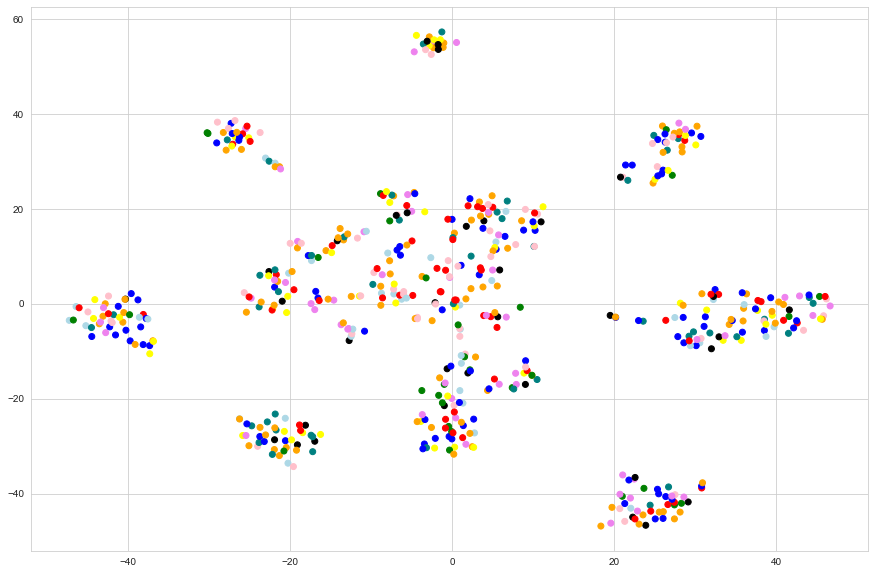

In [75]:
figure = plt.figure(figsize=(15, 10))

ax = figure.add_subplot(111)

ax.scatter(model_X_2d[:, 0], model_X_2d[:, 1], c=colors) # first col , second col 